<a href="https://colab.research.google.com/github/sandyou55/deliveryFeeProject/blob/master/SEM_2024F_code2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Import Modules & Data

In [ ]:
import numpy as np  # Import the NumPy library, often used for numerical computations.
import pandas as pd  # Import the Pandas library for data manipulation and analysis.

# Set a Pandas option to display all columns in a DataFrame when using the `print` function or Jupyter Notebook.
# This is useful when working with wide datasets where not all columns are shown by default.
pd.set_option('display.max_columns', None)

import matplotlib.pyplot as plt  # Import Matplotlib for creating static, interactive, and animated visualizations.
from scipy import stats  # Import statistical functions from the SciPy library.

# Import the 'drive' module from 'google.colab'. This allows you to mount your Google Drive
# to access files stored in your Google Drive from your Colab notebook.
from google.colab import drive

In [ ]:
# This line mounts your Google Drive to the Colab environment, allowing you to access files stored in your Drive.
# After running this line, you'll be prompted to authorize access to your Google Drive.
drive.mount('/content/gdrive')  # Mount your Google Drive at the '/content/gdrive' location.

# This line reads a CSV file stored in your Google Drive and loads it into a Pandas DataFrame named 'df'.
# The file path is '/content/gdrive/MyDrive/merged_NFCS2021_2.csv', which corresponds to a folder called 'MyDrive' in your Google Drive.
# Make sure the file exists at the specified location; otherwise, you'll get a "File not found" error.
pre_df = pd.read_csv('/content/gdrive/MyDrive/merged_NFCS2021_2.csv')

# Once loaded, the DataFrame 'df' will contain the data from the CSV file, with rows representing data entries
# and columns corresponding to the attributes or variables in the dataset.


Mounted at /content/gdrive


In [ ]:
# This line sets the 'NFCSID' column as the index of the DataFrame 'df'.
# Setting the index can be useful for operations like data slicing, filtering, or joining datasets.
# The parameter `drop=False` ensures that the 'NFCSID' column is not removed from the DataFrame
# and remains as a regular column in addition to being the index.
pre_df = pre_df.set_index('NFCSID', drop=False)

# This line displays the first 5 rows of the DataFrame 'df' to give you a preview of the data.
# The `head()` function is often used to check if the data is loaded and formatted correctly.
pre_df.head()

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A2_statedata,A50,A50a,A3a,A50b,A4_1,A4_2,A4_3,A4_4,A4_7,A4_5,A4_6,A4_99,A4a,A51_1,A51_10,A51_11,A51_12,A51_13,A51_14,A51_15,A51_16,A51_17,A51_18,A51_19,A51_20,A51_21,A51_22,A51_40,A51_41,A51_42,A51_43,A51_44,A51_45,A51_46,A51_47,A51_48,A51_49,A51_50,A51_51,A51_90,A51_99,A52_1,A52_2,A52_3,A52_4,A52_5,A52_6,A52_7,A52_8,A52_9,A52_10,A52_11,A52_12,A52_13,A52_14,A52_15,A52_16,A52_17,A52_18,A52_19,A52_20,A52_90,A52_99,A53_1,A53_2,A53_3,A53_4,A53_5,A53_6,A53_7,A53_8,A53_9,A53_10,A53_11,A53_12,A53_13,A53_14,A53_15,A53_16,A53_17,A53_18,A53_19,A53_20,A53_21,A53_40,A53_41,A53_42,A53_43,A53_44,A53_45,A53_90,A53_99,A5,A6,A7,A7a,A11,A8,AM21,X3,A9,A40,A10,A10a,A21,A14,A41,J1,J2,J3,J4,J40,J5,J6,J8,J9,J10,J20,J50,J51_1,J51_2,J51_3,J51_4,J51_5,J51_6,J51_98,J51_99,J52,J32,J33_40,J53,J41_1,J41_2,J41_3,J42_1,J42_2,J43,B1,B2,B4_statedata,B41_1,B41_2,B31_statedata,B42,B43,C1,C2,C3,C4,C5,C10,C11,B14,Ea_1,E7,E8,E20_statedata,E15,P50,P51,P52,F1,F2_1,F2_2,F2_3,F2_4,F2_5,F2_6,G1_statedata,G20,G30_1_statedata,G30_2_statedata,G30_3_statedata,G30_4_statedata,G30_5_statedata,G30_97,G30_98,G30_99,G33,G35,G22_statedata,G25_1,G25_2,G25_3,G25_4,G25_5,G38,G23_statedata,H1,H30_1,H30_2,H30_3,M1_1,M1_2,M4,M20,M21_1,M21_2,M21_3,M21_4,M6,M7,M8,M31,M50,M9,M10,N51,N52_1,N52_2,N52_3,N52_4,N52_5,N52_6,N52_98,N52_99,N31,N32,N33,N34,N35,N36,wgt_n2,wgt_d2,wgt_s3,A1,A2_investorsurvey,A3,B2_1,B2_2,B2_3,B2_4,B2_5,B2_7,B2_20,B2_21,B2_23,B2_24,B2_25,B30,B31_investorsurvey,B3,B32,B4_investorsurvey,B5,B6,B20,B33,B34,B10,B11,B35,B23,B24,B25,B26,C22_1,C22_2,C22_3,C22_4,C23_1,C23_2,C23_3,C23_4,C24,C25,C26,C30,C7,D1_1,D1_2,D2,D3,D21,D30,D31,E1_1,E20_investorsurvey,E5,E6,F30_1,F30_2,F30_3,F30_4,F30_5,F30_6,F30_7,F30_8,F30_9,F30_10,F30_11,F30_12,F31_1,F31_2,F31_3,F31_4,F31_5,F31_6,F31_7,F31_8,F31_9,F31_10,F31_11,G1_investorsurvey,G2,G30_1_investorsurvey,G30_2_investorsurvey,G30_3_investorsurvey,G30_4_investorsurvey,G30_5_investorsurvey,G30_6,G31,G4,G5,G6,G7,G21,G8,G22_investorsurvey,G11,G12,G13,G23_investorsurvey,H31,WGT1,S_Gender2,S_Age,S_Ethnicity,S_Education,S_Income
NFCSID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021010001,2021010001,41,5,3,29579,2,2,31,8,1,0,0,0,0,0,0,0,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,6,1,2,1,6,9,3,1,2,2,2,1,,1,5,9,9,3,3,1,1,,1,,2,1,2,,,,,,,,,2,5,2,4,1,1,1,5,1,4,1,1,2,3,3,2,2,2,1,3,1,1,1,2,2,1,1,1,2,2,1,1,1,1,2,2,1,2,2,2,2,2,2,0,0,0,0,0,1,0,0,,,,1,1,1,1,1,2,1,1,2,2,2,7,6,6,2,2,1,2,,1,3,2,2,2,1,2,2,1,0,0,0,0,0,0,0,2,2,2,2,2,2,0.834316,0.539386,0.725252,1,1,1,1,2,1,2,2,2,1,1,2,2,2,4,1,4,2,8,1,2,,1,2,2,1,2,1,4,1,1,1,2,3,2,2,2,2,2,2,7,1,1,1,9,7,5,2,1,3,5,7,2,3,4,2,3,2,3,3,2,3,2,1,2,1,1,1,2,2,2,2,2,2,2,2,2,2,9,5,1,3,1,1,2,3,8,1,2,2,1,2,1,2,3,2,3,98,1,1.736049,2,1,1,2,3
2021010028,2021010028,21,5,3,21237,2,2,69,12,1,0,0,0,0,0,0,0,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,6,4,1,3,5,4,3,1,2,1,,1,,,5,3,6,2,2,1,1,,1,,1,1,1,0,1,0,0,0,0,0,0,1,5,5,5,4,3,3,1,3,2,1,1,2,1,1,3,3,3,2,,,1,2,2,2,1,1,1,2,2,1,2,2,1,2,2,1,2,2,2,2,2,2,0,0,0,0,0,1,0,0,,,,1,1,1,1,1,2,5,1,2,1,1,6,5,6,3,,,,,1,3,4,3,1,1,2,2,1,0,0,0,0,0,0,0,2,2,2,2,2,2,0.990721,0.737829,0.834315,1,1,1,1,2,1,2,2,2,1,2,2,2,2,5,1,3,1,5,1,2,,1,2,3,2,2,1,3,2,98,1,2,3,3,2,1,2,2,3,10,2,2,2,7,6,3,2,1,3,2,7,1,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,8,4,2,3,2,1,1,1,10,2,1,2,2,1,5,1,2,3,3,2,1,0.547490,2,3,1,2,1
2021010039,2021010039,14,3,2,60087,1,1,70,6,1,0,0,0,0,0,0,0,1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,6,4,1,3,5,5,2,1,8,2,,2,,,2,7,6,3,3,1,1,,,1,2,2,1,1,0,1,0,0,1,0,0,2,5,5,4,3,2,2,3,3,3,1,1,2,3,2,3,3,2,2,,,1,2,2,2,1,2,,,,,2,2,1,3,1,2,2,2,2,2,2,2,0,0,0,0,0,1,0,0,,,,1,1,1,1,1

In [ ]:
# Check the dimensions of the DataFrame `pre_df`.
# The `shape` attribute of a DataFrame returns a tuple with two values:
# - The first value represents the number of rows (data entries) in the DataFrame.
# - The second value represents the number of columns (variables/features) in the DataFrame.
pre_df.shape

(2824, 335)

## 1. SIMPLE Linear Regression

In [ ]:
## Sample selection
## This section focuses on filtering the dataset to include only a specific subsample relevant to the study.

## For example, if the study requires analyzing only the "primary decision maker of the household",
## you can filter the data based on a condition. The condition here is that column `A1` equals 1,
## which presumably identifies individuals who are the primary decision makers.

# Filter the dataset to include only rows where the value in column `A1` equals 1.
# This creates a new DataFrame `df` containing only the relevant subsample for your study.
df = pre_df[pre_df['A1'] == 1]  # Ensure the condition is correctly specified: `['A1'] == 1`.

# Key points to note:
# - `pre_df`: The original DataFrame before filtering.
# - `'A1'`: A column in the DataFrame that indicates whether a person is the primary decision maker.
#   - Value `1` likely means "Yes, this person is the primary decision maker."
#   - Rows where `A1` has a different value will be excluded from the new DataFrame.

# Use `.shape` to check the dimensions of the filtered DataFrame `df`.
# The output will show the number of rows and columns after applying the filter.
# This helps confirm how many observations were included in the subsample and whether filtering worked as intended.
df.shape  # Returns a tuple: (number of rows, number of columns).

(1888, 335)

In [ ]:
## Choose your variable #1
## This is where you define your "dependent variable" for analysis.
## 'Edit Below : Change your var 1'
var1 = 'G31'  # "How important is ESG (environmental, social, and corporate governance issues) to you when making investment decisions?"
# You can replace 'J2' with any other column name depending on the variable you want to analyze.

# Create a separate DataFrame containing only the dependent variable.
# This allows you to focus specifically on this variable without the distraction of other columns in the DataFrame.
my_df = df[[var1]]

# Check the unique values present in the dependent variable column.
# This is useful to understand the range of responses or categories in the variable,
# which might indicate the type of analysis you can perform (e.g., classification or regression).
my_df[var1].unique()


array([ 8, 10,  5,  3,  1, 98,  9,  6,  7,  2,  4, 99])

In [ ]:
# Remove meaningless answers from your dependent variable.
# For example, responses like 'Other' (coded as 90), 'Don't know' (coded as 98), or 'Prefer not to say' (coded as 99)
# do not provide useful information for analysis and should be excluded.
# Here, we focus specifically on removing values 98 and 99, which are considered irrelevant for analysis.

## 'Edit Below : edit remove_list by your variable 1'
# Define the list of values to remove. You can customize this list based on the specific values in your variable.
remove_list = [98, 99]

# Filter out rows where the dependent variable (`var1`) contains any of the values in `remove_list`.
# The `~` operator is used to invert the condition, meaning "keep rows where `var1` is NOT in `remove_list`".
my_df = my_df[~my_df[var1].isin(remove_list)]

# Check the remaining unique values in the filtered dependent variable.
# This step ensures that the irrelevant values (98 and 99) have been successfully removed,
# and helps verify that the data is now ready for analysis.
my_df[var1].unique()


array([ 8, 10,  5,  3,  1,  9,  6,  7,  2,  4])

In [ ]:
# # Optional: If needed, substitute the numerical codes in `var1` with their corresponding dollar values.

# # The substitution is done using the `.replace()` function.
# # The mapping below assigns a dollar value to each numeric code:
# # - 1 maps to 1000
# # - 2 maps to 3500
# # - 3 maps to 7500
# # - ... and so on.
# value_mapping = {
#     1: 1000,
#     2: 3500,
#     3: 7500,
#     4: 17500,
#     5: 37500,
#     6: 75000,
#     7: 175000,
#     8: 375000,
#     9: 750000,
#     10: 1500000
# }

# # Replace the values in `var1` with their corresponding dollar amounts.
# my_df[var1] = my_df[var1].replace(value_mapping)

# # Step 5: Check the transformed variable to ensure the substitution was applied correctly.
# print("Values in `var1` after substitution:", my_df[var1].unique())

In [ ]:
# # Optional: If needed, you can apply a log transformation to `var1`.
# # Log transformations are commonly used to normalize data distributions or reduce the scale of large numbers.
# # Example (uncomment to use):
# my_df[var1] = np.log(my_df[var1])
# print("Log-transformed values in `var1`:", my_df[var1].unique())

In [ ]:
## Choose your variable #2
## This section is used to select an "independent variable", `var2`, for analysis.
## 'Edit Below' ##
var2 = 'B10'

# Take substantial financial risks expecting to earn substantial returns ........................... 1
# Take above average financial risks expecting to earn above average returns ............... 2
# Take average financial risks expecting to earn average returns .................................... 3
# Not willing to take any financial risks .......................................................................... 4
# Don’t know ................................................................................................................. 98
# Prefer not to say .......................................................................................................... 99

# Create a separate DataFrame containing only the column for `var2`.
# This helps isolate the variable and makes it easier to perform operations like filtering or checking its values.
my_df2 = df[[var2]]

## Optional: Remove irrelevant values for variable `var2` if needed.
## 'Edit Below : edit remove_list by your variable 1'
# If `var2` has meaningless or irrelevant values (like '98' for "Don't know" or '99' for "Prefer not to say"),
# you can define a list of such values to exclude them.
# remove_list_2 = [98, 99]
# Filter out rows where `var2` contains any values in `remove_list_2`.
# my_df2 = my_df2[~my_df2[var2].isin(remove_list_2)]

# Check the unique values in `var2` after filtering (or without filtering if no irrelevant values exist).
# This step ensures you understand the distinct values in the column and helps identify any further cleaning needed.
my_df2[var2].unique()


array([ 2,  3,  1,  4, 98, 99])

In [ ]:
remove_list2 = [98, 99]
my_df2 = my_df2[~my_df2[var2].isin(remove_list2)]

# Check the remaining unique values in the filtered dependent variable.
# This step ensures that the irrelevant values (98 and 99) have been successfully removed,
# and helps verify that the data is now ready for analysis.
my_df2[var2].unique()


array([2, 3, 1, 4])

My claim: when Age (Var2) increases, his/her degree of risk taking (Var1) decreases

In [ ]:
# merge the two dataframes (my_df & my_df2)
# "inner" option indicates dropping rows with NaN values.
my_df = pd.merge(my_df, my_df2, left_index=True, right_index=True, how='inner')

my_df.head()

,G31,B10
NFCSID,,
2021010001,8,2
2021010028,10,3
2021010039,5,3
2021010048,3,3
2021010050,1,3


In [ ]:
# Simply check summary statistics of my variables:
my_df.describe()

,G31,B10
count,1705.000000,1705.000000
mean,4.912610,2.512023
std,2.801532,0.796855
min,1.000000,1.000000
25%,2.000000,2.000000
50%,5.000000,3.000000
75%,7.000000,3.000000
max,10.000000,4.000000


### Slope for the Estimated Regression Equation

### $ b_1 = \frac{\sum{(x_i-\bar{x})(y_i -\bar{y})}}{\sum{(x_i - \bar{x})^2}}$

x: Age, y: Risk taking

In [ ]:
x_var = var2
y_var = var1
mean_x = my_df[x_var].mean()
mean_y = my_df[y_var].mean()
print("mean_x:", mean_x)
print("mean_y:", mean_y)

mean_x: 2.5120234604105574
mean_y: 4.912609970674487


In [ ]:
# calculating b1 : Slope for the Estimated Regression Equation Above
b1_term1 = np.sum((my_df[x_var] - mean_x)*(my_df[y_var] - mean_y))
b1_term2 = np.sum(np.power(my_df[x_var] - mean_x, 2))

b1 = b1_term1 / b1_term2
b1

-0.72708497758042

### y-Intercept for the Estimated Regression Equation

### $b_0 = \bar{y} - b_1\bar{x}$

In [ ]:
b0 = mean_y - b1*mean_x
b0

6.739064492068587

### Estimated Regression Equation

### $\hat{y} = b_0 + b_1x$

In [ ]:
my_df['y_hat'] = b0 + b1*my_df[x_var]

### Plot regression line

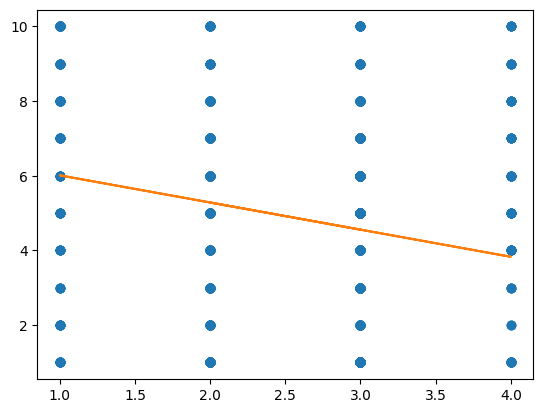

In [ ]:
# Plot the data points for x_var and y_var as dots
plt.plot(my_df[x_var], my_df[y_var], 'o')

# Plot the predicted values (y_hat) as a line
plt.plot(my_df[x_var], my_df['y_hat'])

# Display the plot
plt.show()

# Once plotting is done, drop the y_hat from the dataframe:
my_df = my_df.drop(['y_hat'],axis=1)

### Compare our results with results from sckit-learn

In [ ]:
# Please insatll scikit-learn if the package was not installed.
!pip install scikit-learn

In [ ]:
from sklearn.linear_model import LinearRegression

# Change the x_var data into a column
X = my_df[x_var].values.reshape(-1, 1)

# Change the y_var data into a column
y = my_df[y_var].values.reshape(-1, 1)

# Create a linear regression model
reg = LinearRegression()

# Train the model with the data
reg.fit(X, y)

# Show the intercept (where the line crosses the y-axis) and the slope (how steep the line is)
# Result of b_0 / b_1
reg.intercept_, reg.coef_

(array([6.73906449]), array([[-0.72708498]]))

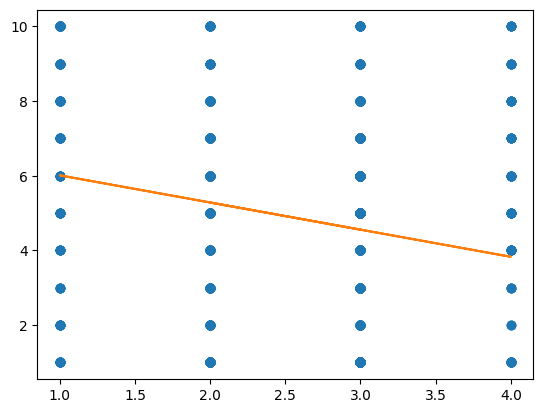

In [ ]:
plt.plot(X,y, 'o')
plt.plot(X, reg.predict(X))
plt.show()

### Error Term Plotting

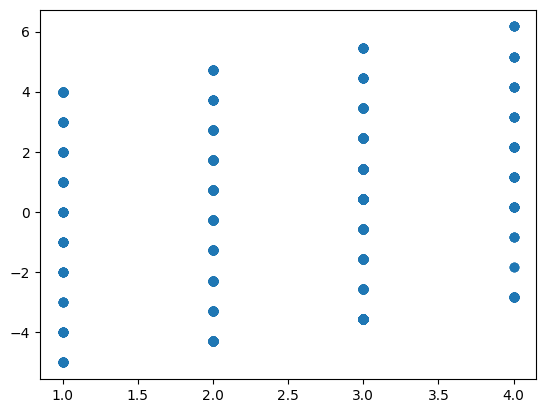

In [ ]:
# Plot the data points for X and the difference between y and the predicted y values (residuals) as dots
plt.plot(X, y - reg.predict(X), 'o')

# Display the plot
plt.show()

### Recommend statsmodels with details of the results.

In [ ]:
from statsmodels.api import OLS  # Import the OLS (Ordinary Least Squares) model from statsmodels
from statsmodels.api import add_constant  # Import the function to add a constant to the model

# Add a constant term to the data (this is needed for the intercept)
X2 = add_constant(X)

# Create an OLS regression model using the data
est = OLS(y, X2)

# Fit the model to the data (find the best fitting line)
est = est.fit()

# Show a summary of the regression results
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.043
Model:                            OLS   Adj. R-squared:                  0.042
Method:                 Least Squares   F-statistic:                     76.09
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           6.32e-18
Time:                        12:03:21   Log-Likelihood:                -4138.0
No. Observations:                1705   AIC:                             8280.
Df Residuals:                    1703   BIC:                             8291.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.7391      0.220     30.680      0.000       6.308       7.170
x1            -0.7271      0.083     -8.723      0.000      -0.891      -0.564
==============================================================================
Omnibus:                      399.857   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.816
Skew:                           0.013   Prob(JB):                     1.54e-16
Kurtosis:                       1.988   Cond. No.                         9.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

- Checking R-squared is closed to 1 is important.
- coef of x1 is x1 imporantance in model.

## 2. MULTIPLE Linear Regression

In [ ]:
# Add more variables as control
var3 = 'A11' # How many children

# build a separate dataframe with var3
my_df2 = df[[var3]]

# check its unique values
my_df2[var3].unique()


array([6, 5, 2, 1, 3, 4])

In [ ]:
## Edit below: you can choose to either remove rows or replace row values with zero ##

# Replace rows where `var3` equals 5 (no financially dependent children) with 0.
# Replace rows where `var3` equals 6 (do not have any children) with 0.
# Using `.loc` ensures we are modifying the DataFrame correctly without warnings.
my_df2.loc[my_df2[var3] == 5, var3] = 0
my_df2.loc[my_df2[var3] == 6, var3] = 0

# Check the unique values in `var3` after the replacements to confirm the changes were applied correctly.
# This helps verify that values 5 and 6 were successfully replaced with 0.
print("Unique values in `var3` after replacements:", my_df2[var3].unique())

Unique values in `var3` after replacements: [0 2 1 3 4]


<ipython-input-24-5409f3049e83>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2.loc[my_df2[var3] == 5, var3] = 0
<ipython-input-24-5409f3049e83>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2.loc[my_df2[var3] == 6, var3] = 0


In [ ]:
# Add varabie 3 to the main dataframe for regression analysis (my_df)
# merge the two dataframes (my_df & my_df2)
# "inner" option indicates dropping rows with NaN values.
my_df = pd.merge(my_df, my_df2, left_index=True, right_index=True, how='inner')

# Simply check summary statistics of my variables:

my_df.describe()

,G31,B10,A11
count,1705.000000,1705.000000,1705.000000
mean,4.912610,2.512023,0.519648
std,2.801532,0.796855,0.929938
min,1.000000,1.000000,0.000000
25%,2.000000,2.000000,0.000000
50%,5.000000,3.000000,0.000000
75%,7.000000,3.000000,1.000000
max,10.000000,4.000000,4.000000


In [ ]:
# Add more variables as control
# perceived financial knowledge
# Q: On a scale from 1 to 7, where 1 means very low and 7 means very high, how would you assess your overall financial knowledge?
var4 = 'M4'

# build a separate dataframe with var4
my_df2 = df[[var4]]

# check its unique values
my_df2[var4].unique()

array([ 6,  5,  3,  7,  4, 99,  2, 98,  1])

In [ ]:
## Edit below : you can choose removing rows or replacing rows value to zero ##

# 98 (Don't know) => None (dropped : we don't use row with 98)
# 99 (Prefer not to say) => None (dropped : we don't use row with 99)

my_df2 = my_df2[my_df2[var4] != 98]
my_df2 = my_df2[my_df2[var4] != 99]

my_df2[var4].unique()

array([6, 5, 3, 7, 4, 2, 1])

In [ ]:
# Add varabie 4 to the main dataframe for regression analysis (my_df)
# merge the two dataframes (my_df & my_df2)
# "inner" option indicates dropping rows with NaN values.
my_df = pd.merge(my_df, my_df2, left_index=True, right_index=True, how='inner')

# Simply check summary statistics of my variables:

my_df.describe()

,G31,B10,A11,M4
count,1700.000000,1700.000000,1700.000000,1700.000000
mean,4.915882,2.512353,0.520588,5.778235
std,2.801766,0.797561,0.930890,0.934398
min,1.000000,1.000000,0.000000,1.000000
25%,2.000000,2.000000,0.000000,5.000000
50%,5.000000,3.000000,0.000000,6.000000
75%,7.000000,3.000000,1.000000,6.000000
max,10.000000,4.000000,4.000000,7.000000


In [ ]:
# Add another variable as control
# B4_investorsurvey
var_another = 'B4_investorsurvey'  # # B4) What is the approximate total value of all of your investments in non-retirement accounts?

# build a separate dataframe with var4
my_df2 = df[[var_another]]

# check its unique values
my_df2[var_another].unique()


array([ 8,  5,  7,  6,  3, 10,  4,  2,  9, 99,  1, 98])

In [ ]:
# Optional: If needed, substitute the numerical codes in `var1` with their corresponding dollar values.

# The substitution is done using the `.replace()` function.
# The mapping below assigns a dollar value to each numeric code:
# - 1 maps to 1000
# - 2 maps to 3500
# - 3 maps to 7500
# - ... and so on.
value_mapping = {
    1: 1000,
    2: 3500,
    3: 7500,
    4: 17500,
    5: 37500,
    6: 75000,
    7: 175000,
    8: 375000,
    9: 750000,
    10: 1500000
}

# Replace the values in `var1` with their corresponding dollar amounts.
my_df2[var_another] = my_df2[var_another].replace(value_mapping)

# Check the transformed variable to ensure the substitution was applied correctly.
print("Values in `var1` after substitution:", my_df2[var_another].unique())


Values in `var1` after substitution: [ 375000   37500  175000   75000    7500 1500000   17500    3500  750000
      99    1000      98]


<ipython-input-30-cef40d296817>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2[var_another] = my_df2[var_another].replace(value_mapping)


In [ ]:
# Optional: If needed, you can apply a log transformation to `var1`.
# Log transformations are commonly used to normalize data distributions or reduce the scale of large numbers.
# Example (uncomment to use):
my_df2[var_another] = np.log(my_df2[var_another])
print("Log-transformed values in `var1`:", my_df2[var_another].unique())

Log-transformed values in `var1`: [12.8346813  10.53209621 12.07254125 11.22524339  8.9226583  14.22097567
  9.76995616  8.16051825 13.52782849  4.59511985  6.90775528  4.58496748]


<ipython-input-31-dd32ba995f65>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_df2[var_another] = np.log(my_df2[var_another])


In [ ]:
# Add the variable to the main dataframe for regression analysis (my_df)
# merge the two dataframes (my_df & my_df2)
# "inner" option indicates dropping rows with NaN values.
my_df = pd.merge(my_df, my_df2, left_index=True, right_index=True, how='inner')

# Simply check summary statistics of my variables:

my_df.head()

,G31,B10,A11,M4,B4_investorsurvey
NFCSID,,,,,
2021010001,8,2,0,6,12.834681
2021010028,10,3,0,6,10.532096
2021010039,5,3,0,5,12.072541
2021010048,3,3,0,6,11.225243
2021010050,1,3,2,6,8.922658


In [ ]:
# Add another "categorical" variable as control
# This variable, `A41`, represents education levels:
# 1: Did not complete high school
# 2: High school graduate/GED
# 3: Some college, no degree
# 4: Associate’s degree
# 5: Bachelor’s degree
# 6: Postgraduate degree
# 98: Don’t know (will be dropped)
# 99: Prefer not to say (will be dropped)
var5 = 'A41'

# build a separate dataframe with var4
my_df2 = df[[var5]]

# check its unique values
my_df2[var5].unique()

array([ 5,  2,  3,  6,  4,  1, 98])

In [ ]:
## Edit below : you can choose removing rows or replacing rows value to zero ##

# 98 (Don't know) => None (dropped : we don't use row with 98)
# 99 (Prefer not to say) => None (dropped : we don't use row with 99)

my_df2 = my_df2[my_df2[var5] != 98]
my_df2 = my_df2[my_df2[var5] != 99]

my_df2[var5].unique()

array([5, 2, 3, 6, 4, 1])

In [ ]:
# Generate dummy variables for `var5`.
# By setting `drop_first=True`, we drop the first category as the reference category,
# ensuring that we create `n-1` dummy variables (where `n` is the total number of categories in `var5`).
dummy_vars = pd.get_dummies(my_df2[var5], prefix='Education', drop_first=True)
dummy_vars = dummy_vars.astype(int)
dummy_vars

,Education_2,Education_3,Education_4,Education_5,Education_6
NFCSID,,,,,
2021010001,0,0,0,1,0
2021010028,0,0,0,1,0
2021010039,1,0,0,0,0
2021010048,0,1,0,0,0
2021010050,0,0,0,1,0
...,...,...,...,...,...
2021036979,0,0,0,0,1
2021036988,0,0,0,0,1
2021036999,0,0,0,1,0


In [ ]:
# Add the variable to the main dataframe for regression analysis (my_df)
# merge the two dataframes (my_df & my_df2)
# "inner" option indicates dropping rows with NaN values.
my_df = pd.merge(my_df, dummy_vars, left_index=True, right_index=True, how='inner')

# Simply check summary statistics of my variables:

my_df.head()

,G31,B10,A11,M4,B4_investorsurvey,Education_2,Education_3,Education_4,Education_5,Education_6
NFCSID,,,,,,,,,,
2021010001,8,2,0,6,12.834681,0,0,0,1,0
2021010028,10,3,0,6,10.532096,0,0,0,1,0
2021010039,5,3,0,5,12.072541,1,0,0,0,0
2021010048,3,3,0,6,11.225243,0,1,0,0,0
2021010050,1,3,2,6,8.922658,0,0,0,1,0


In [ ]:
from statsmodels.api import OLS
from statsmodels.api import add_constant

X = my_df.drop(columns=var1)
X = add_constant(X)
y = my_df[var1]
est = OLS(y, X)
est = est.fit()
y_pred = est.predict(X)

est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    G31   R-squared:                       0.079
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     16.04
Date:                Sun, 24 Nov 2024   Prob (F-statistic):           1.85e-25
Time:                        12:15:34   Log-Likelihood:                -4071.5
No. Observations:                1692   AIC:                             8163.
Df Residuals:                    1682   BIC:                             8217.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.1976      0.660      7.870      0.000       3.902       6.493
B10                  -0.5072      0.088     -5.788      0.000      -0.679      -0.335
A11                   0.4634      0.074      6.275      0.000       0.319       0.608
M4                    0.2289      0.073      3.127      0.002       0.085       0.372
B4_investorsurvey    -0.1113      0.029     -3.850      0.000      -0.168      -0.055
Education_2           0.6103      0.374      1.632      0.103      -0.123       1.344
Education_3           0.6678      0.384      1.741      0.082      -0.085       1.420
Education_4           1.1140      0.408      2.731      0.006       0.314       1.914
Education_5           0.6541      0.361      1.811      0.070      -0.054       1.363
Education_6           0.8218      0.371      2.213      0.027       0.093       1.550
==============================================================================
Omnibus:                      310.254   Durbin-Watson:                   1.923
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.726
Skew:                          -0.020   Prob(JB):                     5.34e-15
Kurtosis:                       2.035   Cond. No.                         181.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### error term plotting


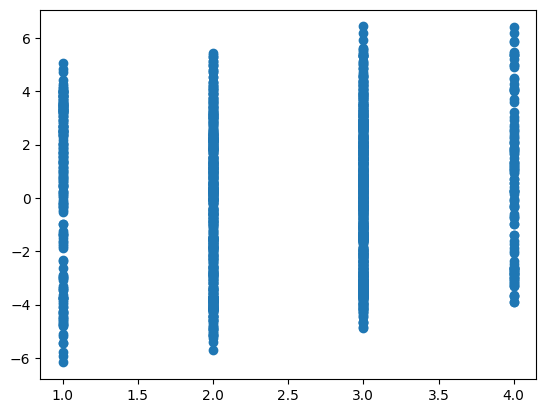

In [ ]:
plt.plot(X[var2], y-y_pred, 'o')
plt.show()

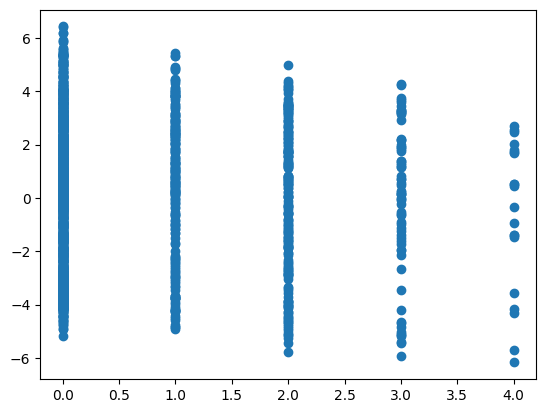

In [ ]:
plt.plot(X[var3], y-y_pred, 'o')
plt.show()

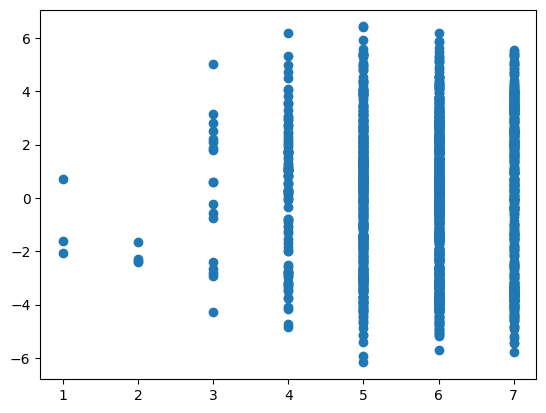

In [ ]:
plt.plot(X[var4], y-y_pred, 'o')
plt.show()